# Сбор таблички с отзывами

## Imports

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from pymystem3 import Mystem
from string import punctuation

import nltk
import pandas as pd
import pymongo
import json
from pymongo import MongoClient
import regex as re
import pprint
import csv
import pandas as pd
import sklearn
import numpy as np

#Aprori
import sys

from itertools import chain, combinations
from collections import defaultdict
from optparse import OptionParser



## Tokenize
from collections import defaultdict
import nltk.tokenize
from nltk.tag import pos_tag
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktLanguageVars


##
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from nltk.stem.porter import PorterStemmer

import spacy

## Classification
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Regression
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

PATH = "./"
%matplotlib inline

## Прозак  

**Действующее вещество:**
Флуоксетин (Fluoxetine)  

**Показания препарата Прозак®**
Депрессии, нервная булимия, обсессивно-компульсивные расстройства (навязчивые мысли и действия).

**Побочные действия**
В начале терапии и при увеличении дозы могут появляться тревога и раздражительность, нарушения сна, сонливость, головная боль, тошнота; реже — рвота и диарея. Возможно развитие анорексии и уменьшение массы тела, а также появление гипонатриемии, особенно у больных пожилого возраста. Редко — возникновение судорожных припадков. Возможны аллергические реакции в виде появления кожной сыпи, зуда, озноба, повышения температуры, боли в мышцах, суставах.

In [2]:
df = pd.read_csv("prozak.csv")
df = df.append(pd.read_csv("fluoxetine.csv"))
df = df[['username', 'text']]
df.head()

,username,text
0,Rebrendiran,Мојов преферира прозак
1,natbes,Прозак в помощь. Это не стеб
2,IvanAmericos,"Чудик, от тебя такое зарево, что твои потуги н..."
3,eric_belov,"Перевернул все вверх дном Потерян, не помню ни..."
4,red_ya_bastard,штож как говорится добро пожаловать в фандом г...



  
Небольшой препроцессинг

In [3]:
!pip install pymystem3

You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:

mystem = Mystem() 

def preprocess_text(text):
#     tokens = mystem.lemmatize(text.lower())
    tokens = text.lower().split()
    tokens = [token for token in tokens if token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text

In [5]:
df.text = df.text.apply(preprocess_text)

In [6]:
must_include = ['приним', "пью", "куп", "выпис", "назнач", "пропис", "проб",
                "депрес", "побоч", "эффек", "хор", "лучш", "хоч",
                "аппет", "есть", "трев", "раздраж", "худ", "вес", "бол", "тошн",
               "темп", "судор", "сып", "зуд", "озноб", "дрож", "колбас", "мышц", "рвот", "вырв"]

In [7]:
df = df[df['text'].str.contains('|'.join(must_include))].reset_index()
df

,index,username,text
0,3,eric_belov,"перевернул все вверх дном потерян, не помню ни..."
1,5,sonya_from,решительно купил прозак
2,9,caecaest,"прозак закончился, пью флу по башке даёт знатн..."
3,10,transalore,"«они принимают виагру, потому что не имеют вре..."
4,13,caecaest,"из-за того, что последние 7 лет я абсолютно не..."
...,...,...,...
6347,9988,morttodo,"у меня с серотонином проблемы, и тут 2 выхода:..."
6348,9990,Zaparin_,в аптеке не продали флуоксетин. лежу весь день...
6349,9992,Gerogerigegegee,"@fadeyeva кстати, про чо рассказать-то? как ху..."
6350,9997,svartvind,"@gonzocurse чего депрессуешь, камрад? флуоксет..."


Проанализируем тональность

In [21]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)
results = model.predict(df.text, k=5)

In [27]:
df = df.join(pd.DataFrame(results))
df.describe()

NameError: name 'results' is not defined

In [ ]:
df[df.skip > 0.6]

In [ ]:
print()
plt.title("Распределение положительных отзывов")
df[df['neutral'] < 0.5]['positive'].hist()
plt.xlabel('Вероятность того, что отзыв позитивный')
plt.show()

In [ ]:
plt.title("Распределение отрицательных отзывов")
df[df['neutral'] < 0.5]['negative'].hist()
plt.xlabel('Вероятность того, что отзыв негативный')
plt.show()

In [ ]:
plt.title("Распределение нейтральных отзывов")
df['neutral'].hist()
plt.xlabel('Вероятность того, что отзыв нейтральный')
plt.show()

In [ ]:
plt.title("Распределение бесполезных отзывов")
df['skip'].hist()
plt.xlabel('Вероятность того, что отзыв бесполезный')
plt.show()

In [ ]:
list(df[df['positive'] > 0.7].text)

In [ ]:
# df = df[((df['positive'] > 0.6) | (df['negative'] > 0.6)) & (df['skip'] < 0.2)].reset_index()
df['is_positive'] = 1 * (df['positive'] > df['negative'])

In [ ]:
(df.is_positive).sum() / len(df)

In [ ]:
plt.title("Соотношение отрицательных и положительных отзывов")
df['is_positive'].hist()
plt.xlabel('0 - негативный, 1 - позитивный')
plt.show()

In [ ]:
clean_df = df.copy()

In [ ]:
side_eff = ['тревога', 'раздражительность', 'нарушения сна', 'сонливость', 'головная боль', 'тошнота', 
            'рвота', 'диарея', 'анорексия', 'похудеть', 'вес', 'гипонатриемия', 'судороги', 'аллергия',
            'сыпь', 'зуд', 'озноб', 'температура', 'боль', 'мышцы', 'суставы']

## Данные с отзывами с сайта otzovik

In [102]:
import pandas as pd

In [124]:
from os import listdir
from os.path import isfile, join
filenames = ['csv/fluoksetin/' + f for f in listdir('csv/fluoksetin') if isfile(join('csv/fluoksetin', f))]

In [125]:
li = []
for f in filenames:
    df = pd.read_csv(f, index_col=None, header=0)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)
df = df.fillna(' 0')

In [126]:
df['Сколько человек рекомендует отзыв'] = df['Сколько человек рекомендует отзыв'].apply(lambda x: int(x[18:]))

In [127]:
df['Репутация'] = df['Репутация'].astype('str')

In [128]:
df['Репутация'] = df['Репутация'].apply(lambda x: int(x[1:]) if len(x)>1 else 0)

In [129]:
df['Репутация'][df['Репутация'] < 0 ]

81    -10
285    -3
Name: Репутация, dtype: int64

In [130]:
df['Заголовок отзывыа']

0                             Иногда он просто спасение
1                       Себя оправдал, но есть побочки.
2                         хотел быть добрым, а похудел.
3                       Флуоксетин меня буквально спас!
4                                           Не помогает
                             ...                       
289                             только по рецепту врача
290                                   Отличный препарат
291                                    Препарат хороший
292                                   Отличный препарат
293    Вреда может быть больше чем помощи !Задумайтесь!
Name: Заголовок отзывыа, Length: 294, dtype: object

In [131]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)
results = model.predict(df['Заголовок отзывыа'], k=5)

In [132]:
df = df.join(pd.DataFrame(results))

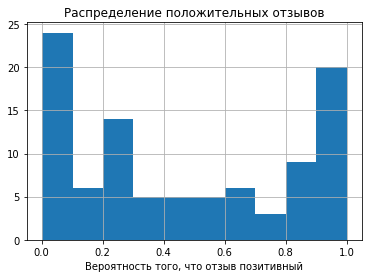

In [133]:
plt.title("Распределение положительных отзывов")
df[df['neutral'] < 0.2]['positive'].hist()
plt.xlabel('Вероятность того, что отзыв позитивный')
plt.show()

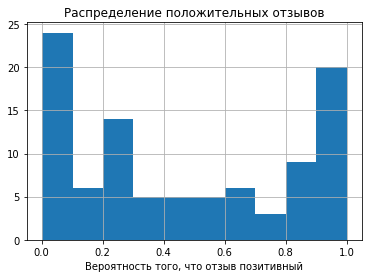

In [134]:
plt.title("Распределение положительных отзывов")
df[df['neutral'] < 0.2]['positive'].hist()
plt.xlabel('Вероятность того, что отзыв позитивный')
plt.show()

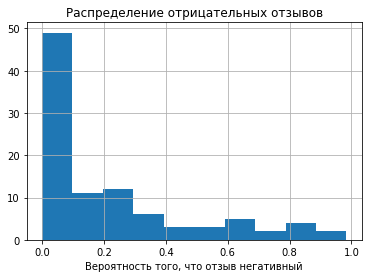

In [135]:
plt.title("Распределение отрицательных отзывов")
df[df['neutral'] < 0.2]['negative'].hist()
plt.xlabel('Вероятность того, что отзыв негативный')
plt.show()

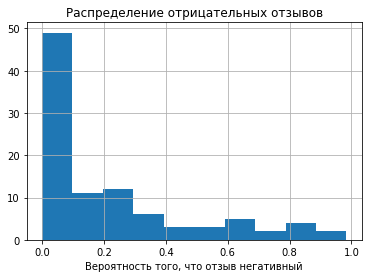

In [136]:
plt.title("Распределение отрицательных отзывов")
df[df['neutral'] < 0.2]['negative'].hist()
plt.xlabel('Вероятность того, что отзыв негативный')
plt.show()

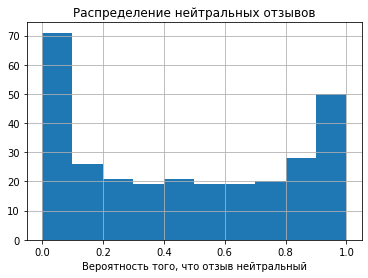

In [137]:
plt.title("Распределение нейтральных отзывов")
df['neutral'].hist()
plt.xlabel('Вероятность того, что отзыв нейтральный')
plt.show()

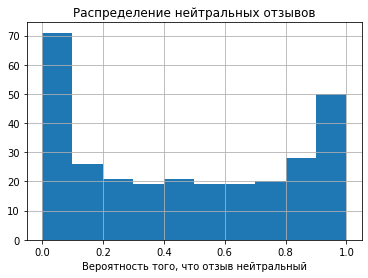

In [138]:
plt.title("Распределение нейтральных отзывов")
df['neutral'].hist()
plt.xlabel('Вероятность того, что отзыв нейтральный')
plt.show()

In [139]:
import matplotlib.pyplot as plt

In [140]:
df1 = df[:10]

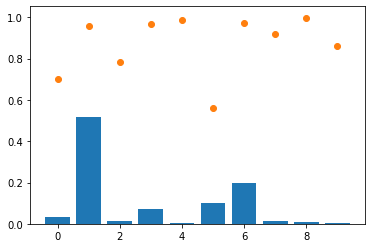

In [141]:
plt.bar(np.arange(len(df1)), df1['positive'])
plt.scatter(np.arange(len(df1)), 1-df1['negative'])
# plt.scatter(np.arange(len(df)), df['neutral'])


In [142]:
df['is_positive'] = 1 * (df['positive'] > df['negative'])

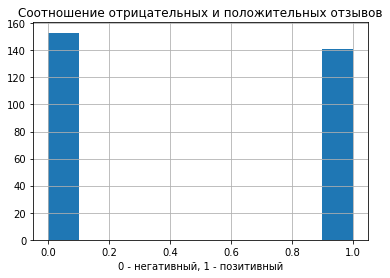

In [143]:
plt.title("Соотношение отрицательных и положительных отзывов")
df['is_positive'].hist()
plt.xlabel('0 - негативный, 1 - позитивный')
plt.show()

In [354]:
list(df[df['positive']>0.9]['Текст отзыва'].head(20))

['Раньше я думала, что депрессию выдумали ленивые американцы, что бы на нее сваливать свою лень. Но недавно с ней я встретилась сама. При том, что депрессия меня захлестнула, когда казалось бы в жизни все стало налаживаться. ',
 'Начала принимать ооочень давно, принимать начала для похудения, но что порадовало и от депрессии он меня тоже спасал. Принимала флу российского производителя(за 38 рублей). От него подташнивало, а иногда был противный привкус в горле (как-будто порошок в горле). Я похудела тогда очень, кг на 10 точно. И перестала принимать. Прошло 2 наверное года и решила снова начать пить от депрессий. Опять пила российского производства, опять эта тошнота. Пошла в аптеку и был только флу Ланнахер. взяла. Я ПРОСТО СЧАСТЛИВА!!!! никакой тошноты, за 2 недели похудела на 7 кг и продолжаю худеть, настроение отличное!',
 'Начала принимать около полугода назад, с промежутками. Из-за того, что отбивает аппетит, чтобы похудеть. Эффект появился где-то через неделю, аппетита не было и 

In [164]:
df['Название товара'].unique()

array(['Антидепрессант Озон "Флуоксетин"',
       'Препарат Канонфарма Флуоксетин',
       'Антидепрессант Варикозон "Флуоксетин"',
       'Антидепрессант Алси-Фарма Флуоксетин',
       'Антидепрессант ГНЦЛС "Флуоксетин"',
       'Антидепрессант Sun Pharma "Флуоксетин. Продеп"',
       'Антидепрессант Ланнахер "Флуоксетин"',
       'Антидепрессант APOTEX Inc. "Апо-Флуоксетин"',
       'Антидепрессант Биоком Флуоксетин'], dtype=object)

In [185]:
names = df['Название товара'].unique()

In [194]:
names

array(['Антидепрессант Озон "Флуоксетин"',
       'Препарат Канонфарма Флуоксетин',
       'Антидепрессант Варикозон "Флуоксетин"',
       'Антидепрессант Алси-Фарма Флуоксетин',
       'Антидепрессант ГНЦЛС "Флуоксетин"',
       'Антидепрессант Sun Pharma "Флуоксетин. Продеп"',
       'Антидепрессант Ланнахер "Флуоксетин"',
       'Антидепрессант APOTEX Inc. "Апо-Флуоксетин"',
       'Антидепрессант Биоком Флуоксетин'], dtype=object)

In [177]:
prob_dict = dict(df.groupby('Название товара')['is_positive'].mean())

In [213]:
rait_dict = {}
raitings = np.array([3.5, 3.64, 3.7, 3.93, 3.8, 3.7, 4.03, 3.62, 3.63])
probs = np.zeros_like(raitings)
for i, k in enumerate(names):
    rait_dict[k] = raitings[i]
    raitings[i] /= 5
    probs[i] = prob_dict[k]

In [214]:
len(raitings)

9

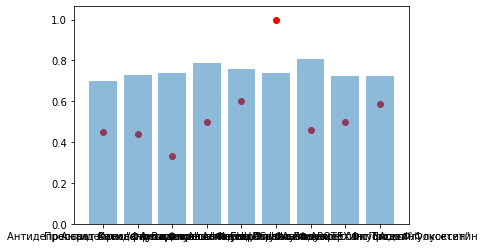

In [215]:
plt.scatter(names, probs, c='r')
plt.bar(names, raitings, alpha=0.5)
plt.show()

In [178]:
prob_dict

{'Антидепрессант APOTEX Inc. "Апо-Флуоксетин"': 0.5,
 'Антидепрессант Sun Pharma "Флуоксетин. Продеп"': 1.0,
 'Антидепрессант Алси-Фарма Флуоксетин': 0.5,
 'Антидепрессант Биоком Флуоксетин': 0.5862068965517241,
 'Антидепрессант Варикозон "Флуоксетин"': 0.3333333333333333,
 'Антидепрессант ГНЦЛС "Флуоксетин"': 0.6,
 'Антидепрессант Ланнахер "Флуоксетин"': 0.46153846153846156,
 'Антидепрессант Озон "Флуоксетин"': 0.4491525423728814,
 'Препарат Канонфарма Флуоксетин': 0.44}

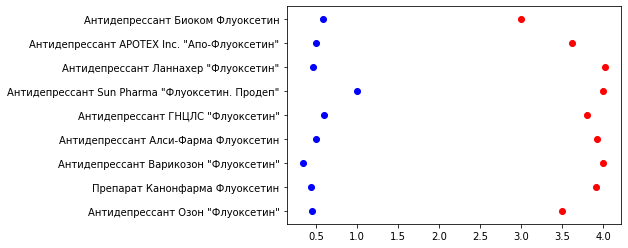

In [184]:
plt.scatter(rait_dict.values(), rait_dict.keys(), color='r')
plt.scatter(prob_dict.values(), prob_dict.keys(), color='b')

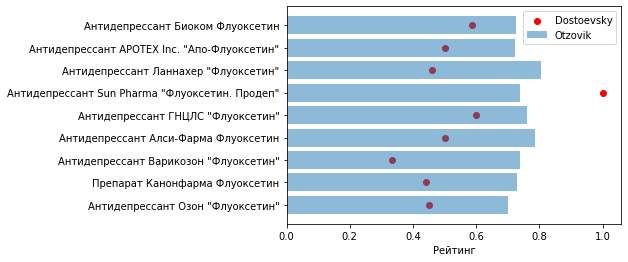

In [352]:
# my_dpi = 96
# plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.scatter(probs,names, color='r', alpha=1., label='Dostoevsky')
plt.barh(names, np.array(raitings), alpha=0.5, label='Otzovik')
plt.xlabel('Рейтинг')
plt.legend(loc='best')
plt.savefig('rait.png')
plt.show()

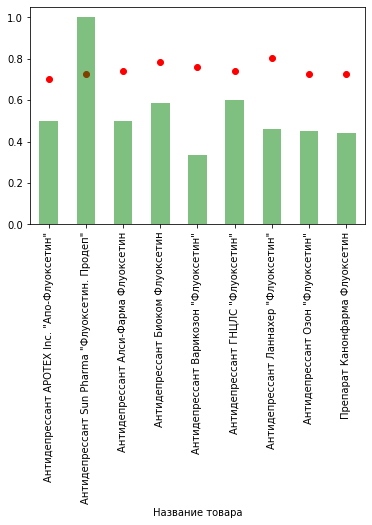

In [217]:
# df.groupby('Название товара')['positive'].mean().plot.bar()
# df.groupby('Название товара')['negative'].mean().plot.bar(color='y')
df.groupby('Название товара')['is_positive'].mean().plot.bar(color='g', alpha=0.5)
plt.scatter(names, raitings, color='r')
plt.show()

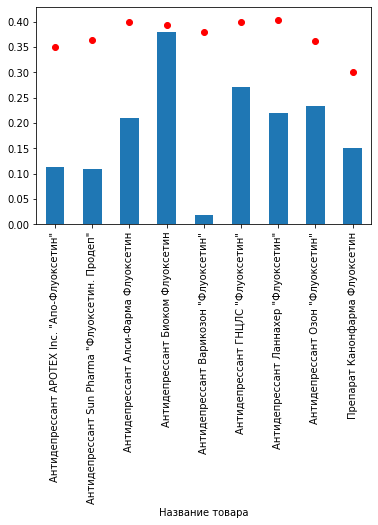

In [148]:
df.groupby('Название товара')['positive'].mean().plot.bar()
# df.groupby('Название товара')['negative'].mean().plot.bar(color='y')
plt.scatter(rait_dict.keys(), rait_dict.values(), color='r')
plt.show()

In [218]:
side_eff = ["трев", "раздраж", 'сон', 'голов', "худ", "вес", "бол", "тошн",
               "темп", "судор", "сып", "зуд", "озноб", "дрож", "мышц", "рвот", "вырв"]

In [330]:
list(df['Текст отзыва'])

['Данный препарат Флуоксетин назначала моей маме врач-психиатр, как антидепрессант необходимый ей после смерти сына. Всегда огромной трагедией является неправильность, когда родители вынуждены хоронить своих детей и пережить подобное всегда очень трудно. Переживаниям матери потерявшей любимого сына, не было ни конца, ни края, поэтому пришлось обратиться к психиатру.',
 'Все мнения верны, поскольку действует индивидуально. Напишу о своем опыте. У меня было три курса флу по 2-4 месяца. Первый раз прописал врач на фоне легкой депрессии. Потом сама себе прописывала ;-) Заодно похудела, что было для меня немаловажно. Отбивает аппетит, поднимает настроение. Это два огромный плюса для меня. Важно подобрать правильную дозировку. Как объяснял мне врач, настроение должно быть ровное со знаком плюс. Начала с 20 мг. Потом пила 30,40. Больше никогда не поднимала. Если решитесь принимать без рекомендаций врача, то начинайте с малого и прислушивайтесь к ощущениям. Прибавляйте дозу постепенно, если не

Разделим текст отзыва по предложениям

In [243]:
from collections import defaultdict
import nltk.tokenize
from nltk.tag import pos_tag
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktLanguageVars
import nltk
nltk.download('punkt')
import re

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/darinamaduar/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [268]:
class ReviewLangVars(PunktLanguageVars):
    sent_end_chars = ('pros:', 'cons:', '[','][','.','?','!', '+')
    
    
sent_tokenizer1 = PunktSentenceTokenizer(lang_vars = ReviewLangVars())


In [269]:
import re
sent_tokenizer = lambda x : re.split('; |, |\*|\n|\+',x)

In [296]:
df['positive_sent'] = df['Достоинства'].apply(sent_tokenizer)
df['negative_sent'] = df['Недостатки'].apply(sent_tokenizer)

In [290]:
df['positive_sent'][10]

['нету плюсов']

In [291]:
sent_tokenizer('Уравновешивает психику, поднимает настроение')

['Уравновешивает психику', 'поднимает настроение']

In [292]:
def subsets(arr):
    """ Returns non empty subsets of arr"""
    return chain(*[combinations(arr, i + 1) for i, a in enumerate(arr)])


def returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet):
        """calculates the support for items in the itemSet and returns a subset
       of the itemSet each of whose elements satisfies the minimum support"""
        _itemSet = set()
        localSet = defaultdict(int)

        for item in itemSet:
                for transaction in transactionList:
                        if item.issubset(transaction):
                                freqSet[item] += 1
                                localSet[item] += 1

        for item, count in localSet.items():
                support = float(count)/len(transactionList)

                if support >= minSupport:
                        _itemSet.add(item)

        return _itemSet


def joinSet(itemSet, length):
        """Join a set with itself and returns the n-element itemsets"""
        return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])


def getItemSetTransactionList(data_iterator):
    transactionList = list()
    itemSet = set()
    for record in data_iterator:
        transaction = frozenset(record)
        transactionList.append(transaction)
        for item in transaction:
            itemSet.add(frozenset([item]))              # Generate 1-itemSets
    return itemSet, transactionList


def runApriori(data_iter, minSupport, minConfidence):
    """
    run the apriori algorithm. data_iter is a record iterator
    Return both:
     - items (tuple, support)
     - rules ((pretuple, posttuple), confidence)
    """
    itemSet, transactionList = getItemSetTransactionList(data_iter)

    freqSet = defaultdict(int)
    largeSet = dict()
    # Global dictionary which stores (key=n-itemSets,value=support)
    # which satisfy minSupport

    assocRules = dict()
    # Dictionary which stores Association Rules

    oneCSet = returnItemsWithMinSupport(itemSet,
                                        transactionList,
                                        minSupport,
                                        freqSet)

    currentLSet = oneCSet
    k = 2
    while(currentLSet != set([])):
        largeSet[k-1] = currentLSet
        currentLSet = joinSet(currentLSet, k)
        currentCSet = returnItemsWithMinSupport(currentLSet,
                                                transactionList,
                                                minSupport,
                                                freqSet)
        currentLSet = currentCSet
        k = k + 1

    def getSupport(item):
            """local function which Returns the support of an item"""
            return float(freqSet[item])/len(transactionList)

    toRetItems = []
    for key, value in list(largeSet.items()):
        toRetItems.extend([(tuple(item), getSupport(item))
                           for item in value])

    toRetRules = []
    for key, value in list(largeSet.items())[1:]:
        for item in value:
            _subsets = map(frozenset, [x for x in subsets(item)])
            for element in _subsets:
                remain = item.difference(element)
                if len(remain) > 0:
                    confidence = getSupport(item)/getSupport(element)
                    if confidence >= minConfidence:
                        toRetRules.append(((tuple(element), tuple(remain)),
                                           confidence))
    return toRetItems, toRetRules


def printResults(items):
    """prints the generated itemsets sorted by support and the confidence rules sorted by confidence"""
    for item, support in sorted(items, key=lambda item_support: item_support[1], reverse=True):
        print(str(item), support)
    #print ("\n------------------------ RULES:")
    #for rule, confidence in sorted(rules, key=lambda rule_confidence: rule_confidence[1]):
        #pre, post = rule
        #print (str(pre), str(post), confidence)


In [293]:
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('russian')

stemmer = nltk.stem.porter.PorterStemmer()

def stem(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = word.replace("'","").replace('"','').replace('.','')
    word1 = stemmer.stem(word)
    return word1

def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool((2 <= len(word) <= 40) and word.lower() not in stopwords)
    return accepted
        
def get_terms(tree):
    term = [ stem(w) for w in tree if acceptable_word(w) ]
    yield term

In [294]:
sent_fullreview = list()
for index,ser_ in df.iterrows():
    sent_fullreview.extend(ser_.positive_sent)

In [295]:
sent_fullreview

['Возвращает к жизни',
 'похудение',
 'Уравновешивает психику',
 'поднимает настроение',
 'отбивает аппетит.',
 'помогло',
 'Дешево и более чем эффективно',
 'Нет',
 'Помогает при психических расстройствах',
 'Препарат работает!',
 'Цена',
 'Недорого',
 'эффективно',
 'Всего одна капсула в день! Очень демократичен по цене)',
 'нету плюсов',
 'делает человека счастливым',
 'уходит раздражительность',
 'депрессия и злость уходят',
 'нет привыкания.',
 'Цена',
 'эффективность',
 'депрессию лечит',
 'Помогает',
 'недорогой.',
 'Достаточно эффективно',
 'без неприятных побочных эффектов',
 'дёшево.',
 'Не хочется есть',
 'Заглушает боль (физическую и душевную) напрочь. Цена не бьёт по карману',
 'мой препарат.',
 'Легко переносится.',
 'Эффективен',
 'отвлеченность',
 'эффект Алисы в стране чудес ;для некоторых -потеря веса.',
 'Действительно помог',
 'бысто прошли побочки',
 'Спас мне жизнь',
 'Эффективен при грамотном назначении',
 'Флуоксетин',
 'действительно',
 'легкое и дешевое решени

In [298]:
sent_neg_review = list()
for index,ser_ in df.iterrows():
    sent_neg_review.extend(ser_.negative_sent)

In [299]:
sent_neg_review

['Серьезный препарат',
 'по рецептам',
 'только под наблюдением врача',
 'Возможны побочки.',
 'похудел',
 'Много побочных эффектов',
 'Не помогает',
 'Нету тут минусов',
 'Сухость во рту',
 'хотя это приучило меня',
 'наконец',
 'пить воду ))',
 'Побочные ужастики',
 'древние таблетки',
 'есть противопоказания',
 'сильнодействующий препарат',
 'Длительный курс приема.',
 'я уже перечислил',
 'головная боль',
 'потеря аппетита.',
 'Побочки',
 'Продается по рецепту.',
 'Иногда попадаются пустышные партии.',
 'Болит голова Бессонница Ходишь как зомби Сложный отказ (болят суставы',
 'голова и тд)',
 'Отсутствие слёз',
 'снижение артериального давления',
 'пофигизм на всё происходящее',
 'нечёткость зрения',
 'головная боль.',
 'Не эффективен для похудения',
 'это точно!',
 'Есть побочки и противопоказания',
 'равнодушие,потеря веса и либидо',
 'Не нашла',
 'во время лечения пропало либидо',
 'но после лечения всё стало даже лучше чем было до лечения',
 'Многовато побочных явлений',
 'Алко

In [301]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/darinamaduar/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [307]:
def is_noun(n):
    if n=='NN' or n=='NNS' or n=='NNP' or n=='NNPS':
        return True

revset=[]
for line in sent_fullreview:
    a = nltk.word_tokenize(line)
    nouns = [word for (word, pos) in nltk.pos_tag(a) if is_noun(pos)] 
    terms = get_terms(nouns)
        
    for term in terms:   
        tempset=[]
        for word in term:
            tempset.append(word)
        revset.append(tempset)
print(revset[:20])

[['жизни'], ['похудение'], ['уравновешивает', 'психику'], ['поднимает', 'настроение'], ['аппетит'], ['помогло'], ['эффективно'], [], ['психических', 'расстройствах'], ['работает'], ['цена'], ['недорого'], ['эффективно'], ['одна', 'капсула', 'день', 'цене'], ['нету', 'плюсов'], ['человека', 'счастливым'], ['уходит', 'раздражительность'], ['злость', 'уходят'], ['привыкания'], ['цена']]


In [303]:
def is_noun(n):
    if n=='NN' or n=='NNS' or n=='NNP' or n=='NNPS':
        return True

revset=[]
for line in sent_neg_review:
    a = nltk.word_tokenize(line)
    nouns = [word for (word, pos) in nltk.pos_tag(a) if is_noun(pos)] 
    terms = get_terms(nouns)
        
    for term in terms:   
        tempset=[]
        for word in term:
            tempset.append(word)
        revset.append(tempset)
print(revset[:20])

[['серьезный', 'препарат'], ['рецептам'], ['наблюдением', 'врача'], ['побочки'], ['похудел'], ['побочных', 'эффектов'], ['помогает'], ['минусов'], ['рту'], ['это', 'приучило'], [], ['воду'], ['побочные', 'ужастики'], ['древние', 'таблетки'], ['противопоказания'], ['сильнодействующий', 'препарат'], ['курс', 'приема'], ['перечислил'], ['головная', 'боль'], ['аппетита']]


In [308]:
items, rules = Apriori(positive, 0.01, 0.05)
print(items)

('цена',) 0.10759493670886076
('настроение',) 0.052742616033755275
('аппетит',) 0.0379746835443038
('эффект',) 0.035864978902953586
('депрессии',) 0.029535864978902954
('аппетита',) 0.029535864978902954
('помогает',) 0.027426160337552744
('хорошее',) 0.023206751054852322
('недорогой',) 0.023206751054852322
('веса',) 0.02109704641350211
('дешево',) 0.0189873417721519
('хорошее', 'настроение') 0.0189873417721519
('эффективность',) 0.016877637130801686
('препарат',) 0.016877637130801686
('похудение',) 0.016877637130801686
('спокойствие',) 0.014767932489451477
('эффективно',) 0.014767932489451477
('низкая',) 0.014767932489451477
('снижение',) 0.012658227848101266
('успокаивает',) 0.012658227848101266
('действие',) 0.012658227848101266
('отсутствие',) 0.012658227848101266
('реально',) 0.012658227848101266
('цена', 'низкая') 0.012658227848101266
('приема',) 0.010548523206751054
('жизни',) 0.010548523206751054
('хороший',) 0.010548523206751054
('настроения',) 0.010548523206751054
('эффективны

In [324]:
def is_noun(n):
    if n=='NN' or n=='NNS' or n=='NNP' or n=='NNPS':
        return True

revset=[]
for line in sent_neg_review:
    a = nltk.word_tokenize(line)
    nouns = [word for (word, pos) in nltk.pos_tag(a) if is_noun(pos)] 
    terms = get_terms(nouns)
        
    for term in terms:   
        tempset=[]
        for word in term:
            tempset.append(word)
        revset.append(tempset)
print(revset[:20])

[['серьезный', 'препарат'], ['рецептам'], ['наблюдением', 'врача'], ['побочки'], ['похудел'], ['побочных', 'эффектов'], ['помогает'], ['минусов'], ['рту'], ['это', 'приучило'], [], ['воду'], ['побочные', 'ужастики'], ['древние', 'таблетки'], ['противопоказания'], ['сильнодействующий', 'препарат'], ['курс', 'приема'], ['перечислил'], ['головная', 'боль'], ['аппетита']]


In [325]:
items, rules = Apriori(negative, 0.01, 0.05)
print(items)

('эффекты',) 0.06018518518518518
('побочные',) 0.05787037037037037
('побочных',) 0.04861111111111111
('побочные', 'эффекты') 0.04398148148148148
('либидо',) 0.03009259259259259
('побочки',) 0.03009259259259259
('эффектов',) 0.03009259259259259
('побочных', 'эффектов') 0.03009259259259259
('рецепту',) 0.02546296296296296
('привыкание',) 0.023148148148148147
('боль',) 0.023148148148148147
('побочек',) 0.023148148148148147
('сонливость',) 0.018518518518518517
('препарат',) 0.018518518518518517
('потеря',) 0.018518518518518517
('нашла',) 0.016203703703703703
('снижение',) 0.013888888888888888
('эффект',) 0.013888888888888888
('апатия',) 0.013888888888888888
('бессонница',) 0.013888888888888888
('тошнота',) 0.013888888888888888
('головная',) 0.013888888888888888
('врача',) 0.013888888888888888
('аппетита',) 0.013888888888888888
('боль', 'головная') 0.013888888888888888
('приема',) 0.011574074074074073
('рту',) 0.011574074074074073
('это',) 0.011574074074074073
('пить',) 0.011574074074074073

In [309]:
from nltk.corpus import opinion_lexicon

In [318]:
def custom_liu_hu_lexicon(sentence):
    '''Takes in a sentence and returns the sentiment of the sentence by counting the no of positive and negitive 
    and negitive words and by reversing the sentiment if the words NO or NOT are present
    '''
    from nltk.corpus import opinion_lexicon
    from nltk.tokenize import treebank

    tokenizer = treebank.TreebankWordTokenizer()
    pos_words = 0
    neg_words = 0
    tokenized_sent = [word.lower() for word in tokenizer.tokenize(sentence)]

    x = list(range(len(tokenized_sent))) 
    y = []
    isNegation = False
    negationWords = ['нет','не','никогда','ничего','тяжело','сложно','страшно','']

    for word in tokenized_sent:
        if word in opinion_lexicon.positive():
            pos_words += 1
            y.append(1) # positive
        elif word in opinion_lexicon.negative():
            neg_words += 1
            y.append(-1) # negative
        else:
            y.append(0) # neutral
            
        if word in negationWords:
            isNegation = True

    if pos_words > neg_words and isNegation==True:
        return 'neg'
    elif pos_words > neg_words:
        return 'pos'
    elif pos_words < neg_words and isNegation==True:
        return 'pos'
    elif pos_words < neg_words:
        return 'neg'
    elif pos_words == neg_words:
        return 'neutral'

neutral_review=[]
positive_review=[]
negative_review=[]
for sentence in sent_fullreview + sent_neg_review:
    for i in items:
        if i[0][0] in sentence:
            #print(i[0][0] +"--" + sentence)
            x=custom_liu_hu_lexicon(sentence)
            if(x=="pos"):
                positive_review.append(sentence)
            elif(x=="neg"):
                negative_review.append(sentence)
            else:
                neutral_review.append(sentence)
            break

for sentence in sent_neg_review:
    for i in items:
        if i[0][0] in sentence:
            #print(i[0][0] +"--" + sentence)
            negative_review.append(sentence)
            break
print('done')            

done


In [319]:
negative_review

['Серьезный препарат',
 'Много побочных эффектов',
 'Не помогает',
 'сильнодействующий препарат',
 'Длительный курс приема.',
 'потеря аппетита.',
 'снижение артериального давления',
 'Не эффективен для похудения',
 'равнодушие,потеря веса и либидо',
 'Алкоголь! Во время приема Флу ни в коем случае. От бокала вина меня развозило в хламину',
 'побочные эффекты',
 'Опасный препарат и принимать его действительно нужно только по рекомендации врача.',
 'много побочных эффектов (читайте мой отзыв)',
 'Побочные эффекты довольно ощутимы',
 'На аппетит не влияет (выдумки',
 'само применение препарата',
 'отсутствие любого рода эмоций',
 'побочный эффект',
 'Побочный эффект в виде диареи. Снижается масса теля.',
 'долго ждать эффекта',
 'при длительных приемах может вызвать и дибает',
 'Не всем помогает',
 'Побочные эффекты,отсутствие результата',
 'Неопределенный эффект',
 'Легкая бессонница в начале приема',
 'Серьезный препарат! принимать только по назначению врача!',
 'чувства реальности.Отс

In [331]:
positive_review

[]

In [323]:
opinion_lexicon?

In [328]:
import pymorphy2 